In [1]:
import time
import platform
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
print('Created using Python', platform.python_version())

Last updated: 08/04/2016
Created using Python 3.5.1


# Awesome things that you can do in IPython Notebooks

(in progress, based on a notebook from Sebastian Raschka)

<br>
<br>

## Writing local files

In [2]:
%%file hello.py
def func_inside_script(x, y):
    return x + y
print('Hello World')

Writing hello.py


<br>
<br>

## Running Python scripts

We can run Python scripts in IPython via the %run magic command. For example, the Python script that we created in the [Writing local files](#Writing-local-files) section.

In [3]:
%run hello.py

Hello World


In [4]:
func_inside_script(1, 2)

3

<br>
<br>

## Benchmarking

In [5]:
%timeit [x**2 for x in range(100)] 

10000 loops, best of 3: 36.7 µs per loop


In [6]:
%timeit -r 5 -n 100 [x**2 for x in range(100)] 

100 loops, best of 5: 39.2 µs per loop


<br>
<br>

## Using system shell commands

By prepending a "`!`" we can conveniently execute most of the system shell commands, below are just a few examples.

In [7]:
my_dir = 'new_dir'
!mkdir $my_dir
!pwd
!touch $my_dir'/some.txt'
!ls -l './new_dir'
!ls -l $my_dir | wc -l

/home/dj/python/python-course/notebooks/libraries3
total 0
-rw-rw-r-- 1 dj dj 0 apr  8 11:19 some.txt
2


<br>
<br>

## Debugging

In [8]:
def some_func():
    var = 'hello world'
    for i in range(5):
        print(i)
    i / 0
    return 'finished'

In [9]:
%debug
some_func()

0
1
2
3
4


ERROR: No traceback has been produced, nothing to debug.


ZeroDivisionError: division by zero

<br>
<br>

## Inline Plotting with matplotlib

In [10]:
%matplotlib inline

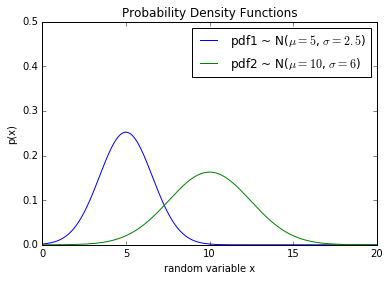

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import math

def pdf(x, mu=0, sigma=1):
    """Calculates the normal distribution's probability density 
        function (PDF).  
        
    """
    term1 = 1.0 / ( math.sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1 * term2


x = np.arange(0, 100, 0.05)

pdf1 = pdf(x, mu=5, sigma=2.5**0.5)
pdf2 = pdf(x, mu=10, sigma=6**0.5)

plt.plot(x, pdf1)
plt.plot(x, pdf2)
plt.title('Probability Density Functions')
plt.ylabel('p(x)')
plt.xlabel('random variable x')
plt.legend(['pdf1 ~ N($\mu=5$, $\sigma=2.5$)', 'pdf2 ~ N($\mu=10$, $\sigma=6$)'], loc='upper right')
plt.ylim([0,0.5])
plt.xlim([0,20])

plt.show()

<br>
<br>

## C-extensions via the Cython magic

Cython (see [Cython's C-extensions for Python](http://cython.org)) is basically a hybrid between C and Python and can be pictured as compiled Python code with type declarations.
Since we are working in an IPython notebook here, we can make use of the very convenient IPython magic: It will take care of the conversion to C code, the compilation, and eventually the loading of the function.
Also, we are adding C type declarations; those type declarations are not necessary for using Cython, however, it will improve the performance of our code significantly.

In [ ]:
%load_ext cythonmagic

In [ ]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)
@cython.cdivision(True)
cpdef cython_lstsqr(x_ary, y_ary):
    """ Computes the least-squares solution to a linear matrix equation. """
    cdef double x_avg, y_avg, var_x, cov_xy,\
         slope, y_interc, temp
    cdef double[:] x = x_ary # memoryview
    cdef double[:] y = y_ary
    cdef unsigned long N, i
    
    N = x.shape[0]
    x_avg = 0
    y_avg = 0
    for i in range(N):
        x_avg += x[i]
        y_avg += y[i]
    x_avg = x_avg/N
    y_avg = y_avg/N
    var_x = 0
    cov_xy = 0
    for i in range(N):
        temp = (x[i] - x_avg)
        var_x += temp**2
        cov_xy += temp*(y[i] - y_avg)
    slope = cov_xy / var_x
    y_interc = y_avg - slope*x_avg
    return (slope, y_interc)

In [ ]:
import numpy as np

x_ary = np.array([x_i*np.random.randint(8,12)/10 for x_i in range(100)])
y_ary = np.array([y_i*np.random.randint(10,14)/10 for y_i in range(100)])

In [ ]:
cython_lstsqr(x_ary, y_ary)

<br>
<br>

## Running Fortran Code

There is also a convenient IPython magic command for compiling Fortran code. The Fortran magic uses NumPy's [F2PY](http://www.f2py.com) module for compiling and running the Fortran code. For more information, please see the ['Fortran magic's documentation'](http://nbviewer.ipython.org/github/mgaitan/fortran_magic/blob/master/documentation.ipynb).

In [ ]:
%install_ext https://raw.github.com/mgaitan/fortran_magic/master/fortranmagic.py

In [ ]:
%load_ext fortranmagic

In [ ]:
%%fortran
SUBROUTINE fortran_lstsqr(ary_x, ary_y, slope, y_interc)
    ! Computes the least-squares solution to a linear matrix equation. """
    IMPLICIT NONE
    REAL(8), INTENT(in), DIMENSION(:) :: ary_x, ary_y
    REAL(8), INTENT(out) :: slope, y_interc
    REAL(8) :: x_avg, y_avg, var_x, cov_xy, temp
    INTEGER(8) :: N, i
    
    N = SIZE(ary_x)

    x_avg = SUM(ary_x) / N
    y_avg = SUM(ary_y) / N
    var_x = 0
    cov_xy = 0
    
    DO i = 1, N
        temp = ary_x(i) - x_avg
        var_x = var_x + temp**2
        cov_xy = cov_xy + (temp*(ary_y(i) - y_avg))
    END DO
    
    slope = cov_xy / var_x
    y_interc = y_avg - slope*x_avg

END SUBROUTINE fortran_lstsqr

In [ ]:
import numpy as np

x_ary = np.array([x_i*np.random.randint(8,12)/10 for x_i in range(100)])
y_ary = np.array([y_i*np.random.randint(10,14)/10 for y_i in range(100)])

In [ ]:
fortran_lstsqr(x_ary, y_ary)

<br>
<br>

In [12]:
%%bash
echo "Hello World!"

Hello World!


## Rich display methods

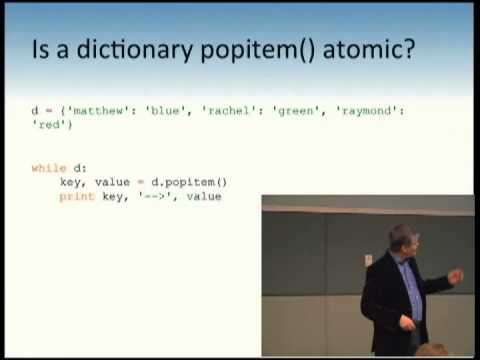

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('OSGv2VnC0go')

In [14]:
from IPython.display import IFrame
IFrame('https://docs.python.org', '100%', 500)

In [15]:
from IPython.display import HTML
HTML("""<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>""")

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


In [16]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

In [17]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>